<a href="https://colab.research.google.com/github/balusu-bhanu-prakash/Automatic-Indian-Sign-Language-Translator-ISL/blob/master/GCN_with_BERT_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install mediapipe

In [ ]:
!pip install transformers

In [ ]:
!pip install tensorflow tensorflowjs opencv-python posenet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 39.5 MB/s eta 0:00:00
  Created wheel for posenet: filename=posenet-0.0.3-py3-none-any.whl size=12230 sha256=0ec55e14027f0e31f96491a09a47043130bc1b6995236fcf70e42b5f150a942e
  Stored in directory: /root/.cache/pip/wheels/d6/68/78/80742546dd51c3a0f1eea603ba4197a7a0a459619c65f2a082
Successfully built posenet
  Attempting uninstall: typing-

# **Testing (do not run sections with **)

In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
import cv2
import numpy as np
from posenet import model as posenet
import json

# Load the pre-trained PoseNet model
sess = tf.compat.v1.Session()
model = posenet.load_model(101, sess)
model.summary()

# Define a function to process a single frame and extract keypoints
def process_frame(frame):
    input_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_image = cv2.resize(input_image, (256, 256))
    input_image = input_image.astype(np.float32)
    input_image = (input_image / 127.5) - 1.0

    input_image = np.expand_dims(input_image, axis=0)
    keypoints = model.predict(input_image)

    return keypoints[0]

# Iterate through the video frames and extract keypoints
cap = cv2.VideoCapture('')
keypoints_list = []

while True:
    ret, frame = cap.read()

    if not ret:
        break

    keypoints = process_frame(frame)
    keypoints_list.append(keypoints)

    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Save the extracted keypoints to a JSON file
with open('keypoints.json', 'w') as f:
    json.dump(keypoints_list, f)


TypeError: ignored

In [ ]:
from yaml.loader import Loader
import tensorflow as tf
import tensorflowjs as tfjs
import cv2
import numpy as np
from posenet import decode_multiple_poses, load_model

# Load the pre-trained PoseNet model
sess = tf.compat.v1.Session()
model = load_model(101, sess)

# Define a function to process a single frame and extract keypoints
def process_frame(frame):
    input_image, display_image, output_scale = posenet.read_cap(
        frame, scale_factor=0.7125, output_stride=16
    )
    heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = sess.run(
        model.posenet_outputs,
        feed_dict={
            model.posenet_inputs: np.expand_dims(input_image, axis=0)
        }
    )
    poses = decode_multiple_poses(
        heatmaps_result.squeeze(axis=0),
        offsets_result.squeeze(axis=0),
        displacement_fwd_result.squeeze(axis=0),
        displacement_bwd_result.squeeze(axis=0),
        output_stride=16,
        max_pose_detections=10,
        min_pose_score=0.25
    )
    keypoint_coords = [pose['keypoints'] for pose in poses]

    return keypoint_coords

# Iterate through the video frames and extract keypoints
cap = cv2.VideoCapture('/content/drive/MyDrive/WLASL/start_kit/videos/a/01611.mp4')
keypoints_list = []

while True:
    ret, frame = cap.read()

    if not ret:
        break

    keypoints = process_frame(frame)
    keypoints_list.append(keypoints)

    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Save the extracted keypoints to a JSON file
with open('keypoints.json', 'w') as f:
    json.dump(keypoints_list, f)


TypeError: ignored

# **HKD

In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

def extract_hand_keypoints(frame, mp_hands):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hands
    results = mp_hands.process(frame_rgb)

    # Define the indices of the desired hand keypoints
    desired_keypoint_indices = [0,1,2, 4,5, 8,9, 12,13, 16,17,20,6,10,14,18]  # Example: Select only the keypoints of the thumb, index finger, middle finger, ring finger, and pinky finger

    # Extract hand keypoints from the results
    keypoints = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for i, landmark in enumerate(hand_landmarks.landmark):
                if i in desired_keypoint_indices:
                    keypoints.append([landmark.x, landmark.y, landmark.z])
    return keypoints

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands.Hands()

# Example usage
video_path = '/content/drive/MyDrive/WLASL/start_kit/videos/a/01615.mp4'

# Define the desired frame indices

cap = cv2.VideoCapture(video_path)

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the desired frame indices based on video length
interval = 5  # Adjust this value as needed
selected_frames = range(0, frame_count, interval)

frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_index in selected_frames:
        # Extract hand keypoints using MediaPipe Hands
        keypoints = extract_hand_keypoints(frame, mp_hands)

        # Draw keypoints on the frame
        for kp in keypoints:
            x, y, _ = kp
            cv2.circle(frame, (int(x * frame.shape[1]), int(y * frame.shape[0])), 5, (0, 255, 0), -1)

        # Display the frame with keypoints
        cv2_imshow(frame)

        # Wait for key press to display the next frame
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break

    frame_index += 1

# Release resources
cap.release()
cv2.destroyAllWindows()

# **FKD

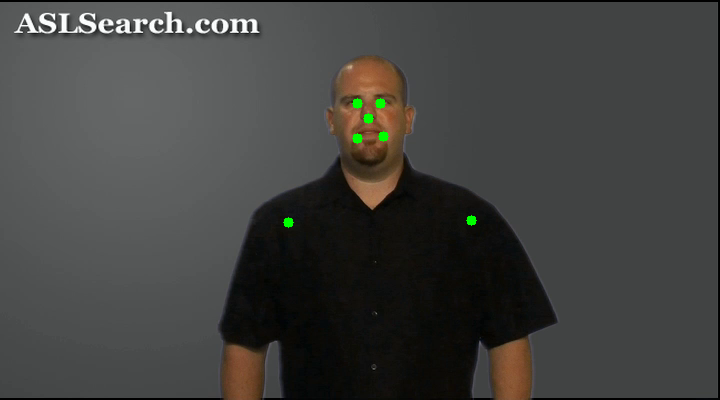

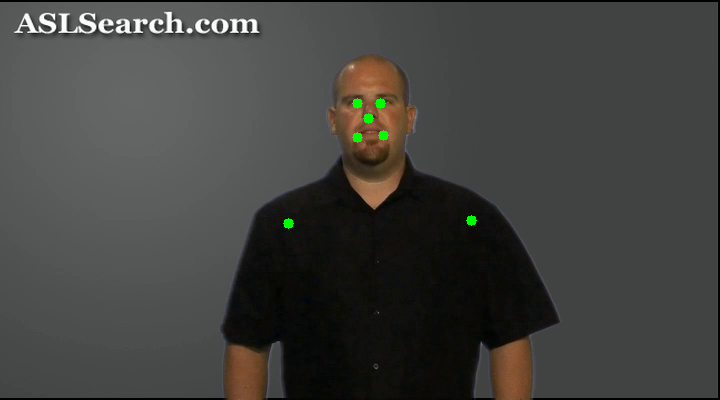

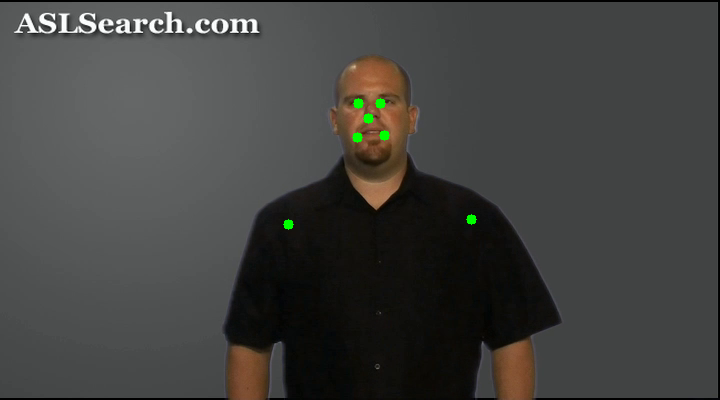

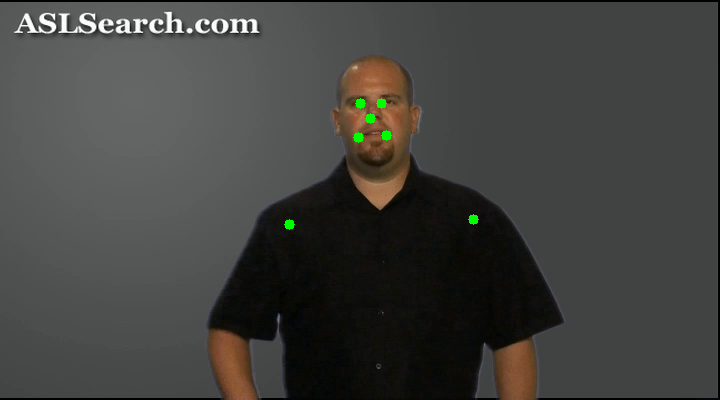

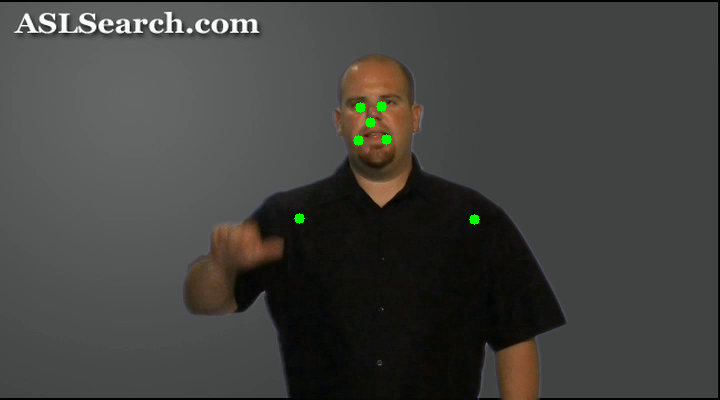

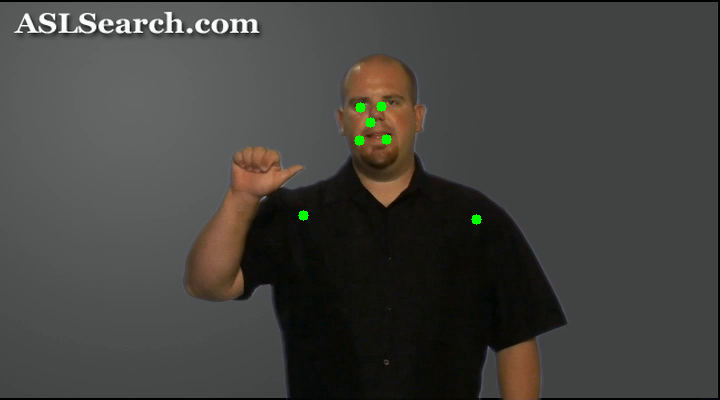

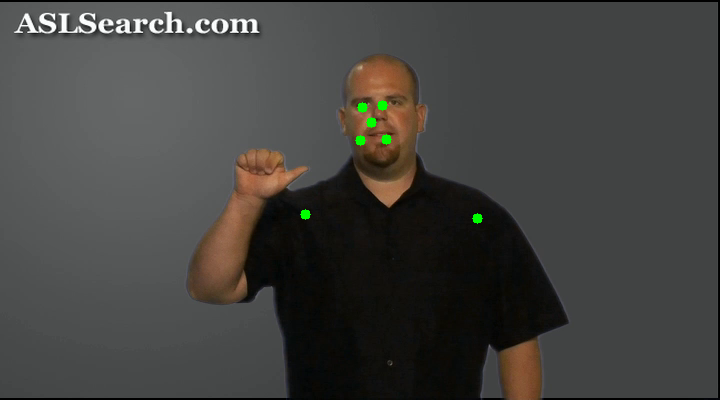

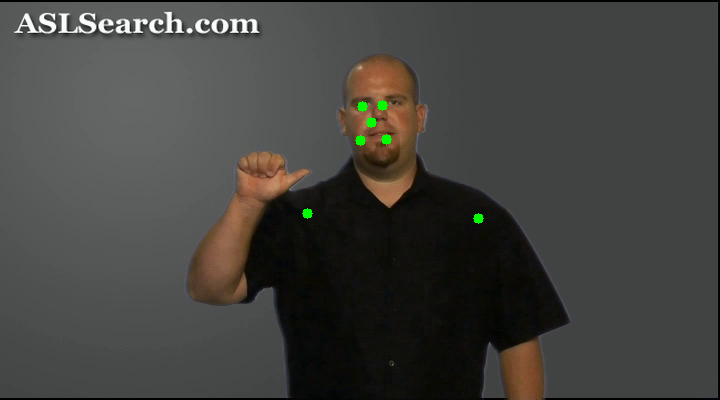

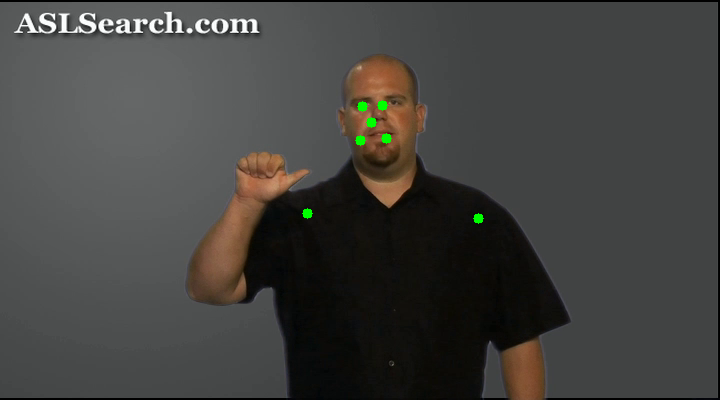

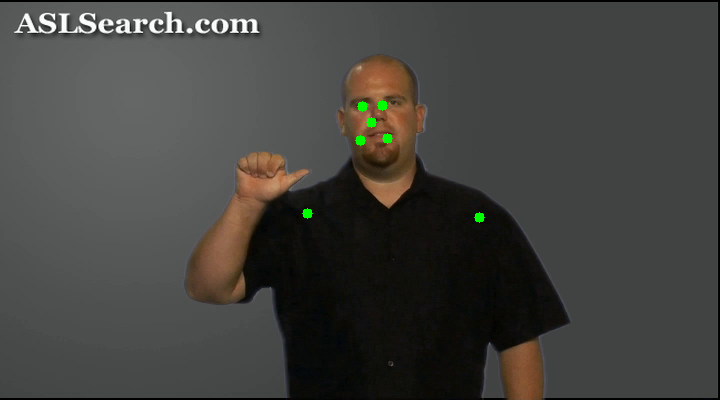

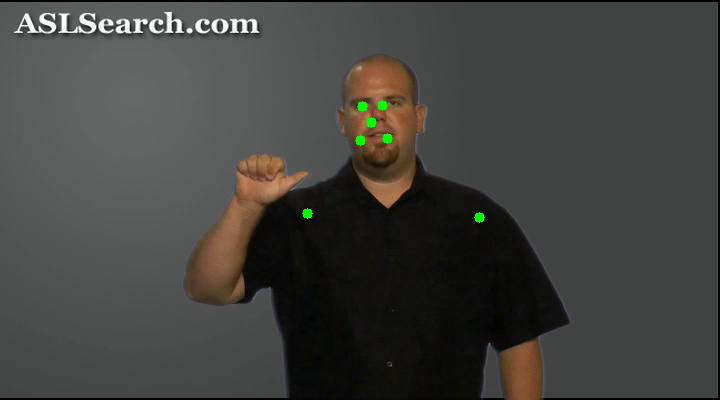

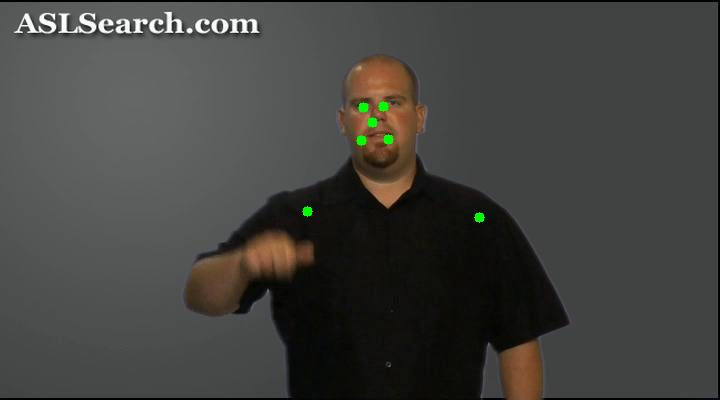

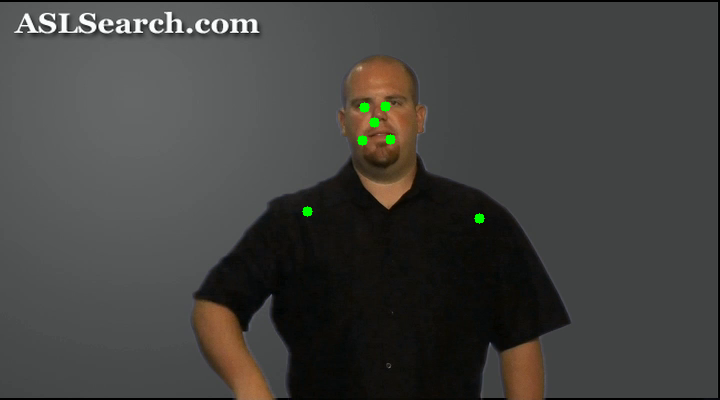

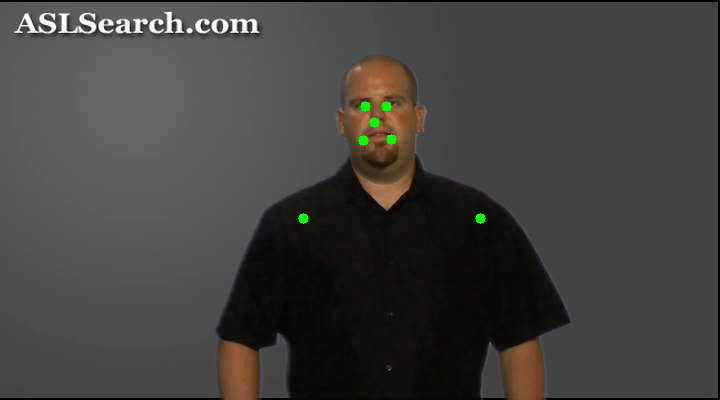

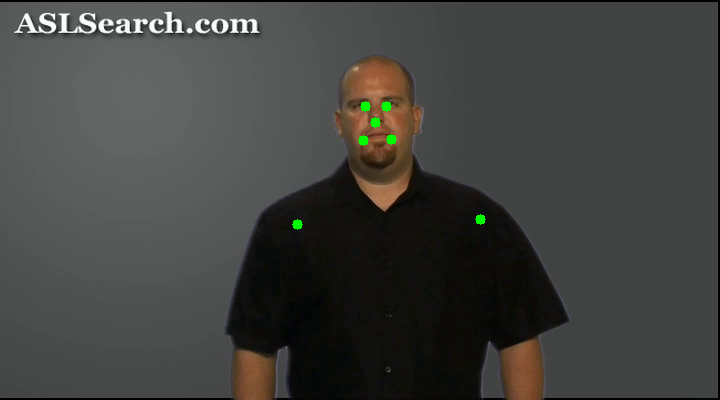

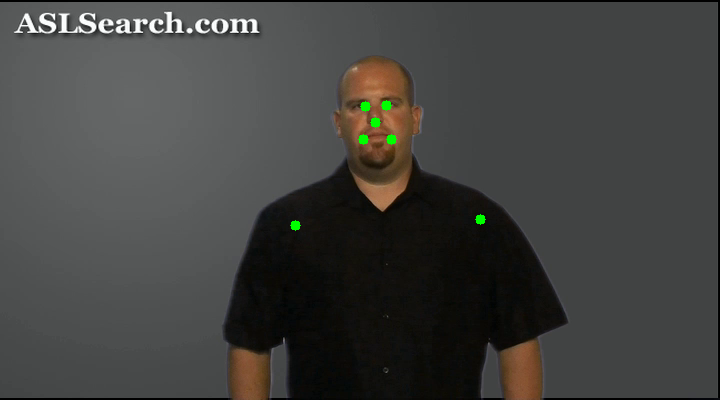

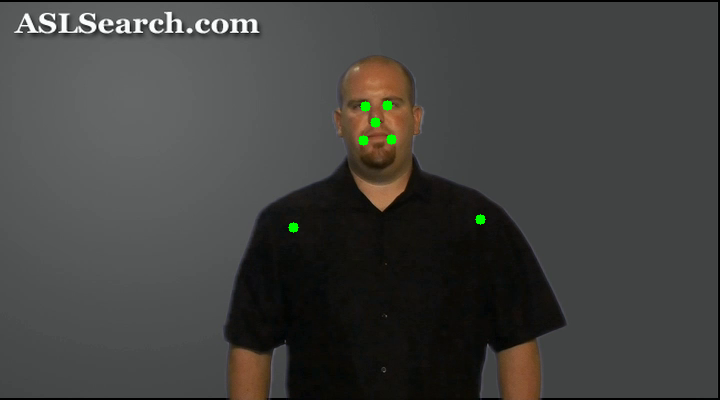

In [ ]:
def extract_keypoints(frame, mp_pose, mp_solutions):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    results = mp_pose.process(frame_rgb)

    # Define the desired keypoints for shoulders, neck, eyes, and mouth
    desired_keypoint_indices = [mp_solutions.PoseLandmark.LEFT_SHOULDER,
                                mp_solutions.PoseLandmark.RIGHT_SHOULDER,
                                mp_solutions.PoseLandmark.LEFT_EYE_INNER,
                                mp_solutions.PoseLandmark.RIGHT_EYE_INNER,
                                mp_solutions.PoseLandmark.MOUTH_LEFT,
                                mp_solutions.PoseLandmark.MOUTH_RIGHT,
                                mp_solutions.PoseLandmark.NOSE]

    # Extract keypoints from the results
    keypoints = []
    if results.pose_landmarks:
        for landmark in desired_keypoint_indices:
            keypoint = results.pose_landmarks.landmark[landmark.value]
            keypoints.append([keypoint.x, keypoint.y, keypoint.z])
    return keypoints

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Example usage
video_path = '/content/drive/MyDrive/WLASL/start_kit/videos/a/01615.mp4'

# Define the desired frame indices
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the desired frame indices based on video length
interval = 5  # Adjust this value as needed
selected_frames = range(0, frame_count, interval)

frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_index in selected_frames:
        # Extract keypoints using MediaPipe Pose
        keypoints = extract_keypoints(frame, mp_pose, mp.solutions.pose)

        # Draw keypoints on the frame
        for kp in keypoints:
            x, y, _ = kp
            cv2.circle(frame, (int(x * frame.shape[1]), int(y * frame.shape[0])), 5, (0, 255, 0), -1)

        # Display the frame with keypoints
        cv2_imshow(frame)

        # Wait for key press to display the next frame
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break

    frame_index += 1

# Release resources
cap.release()
cv2.destroyAllWindows()

#  **H&F KD

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.4 MB/s eta 0:00:00


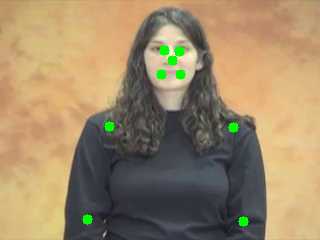

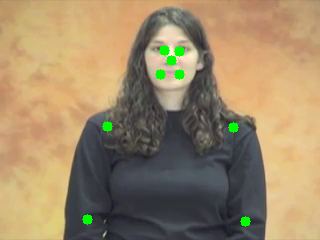

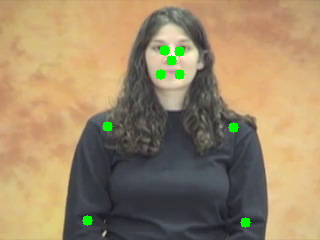

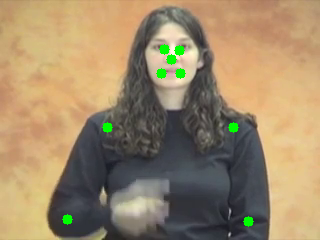

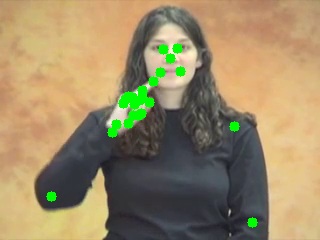

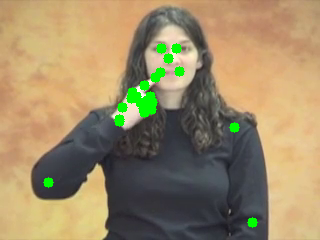

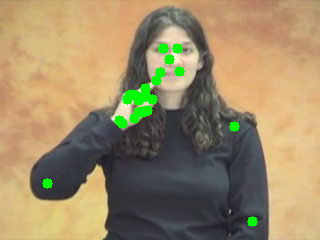

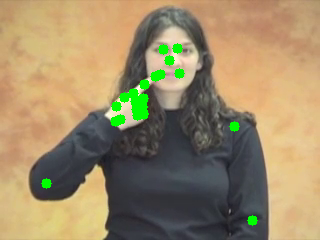

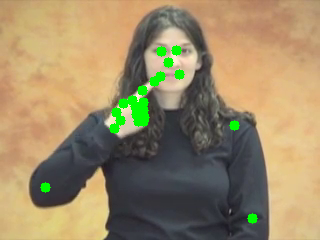

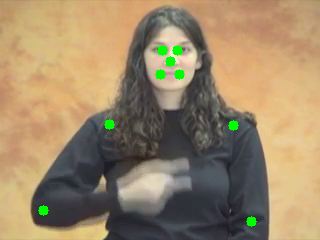

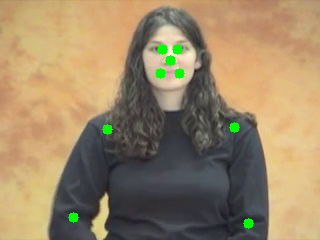

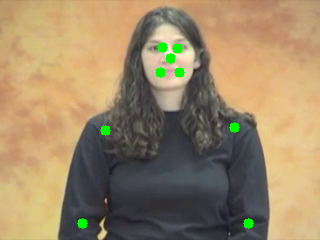

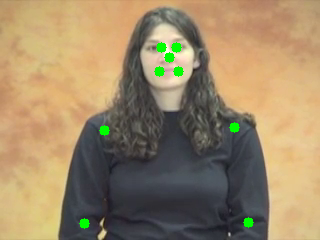

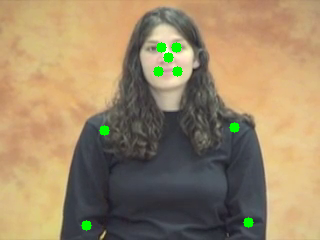

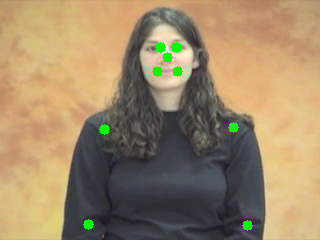

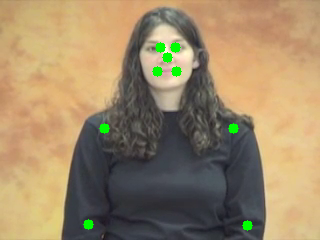

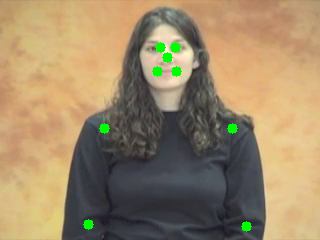

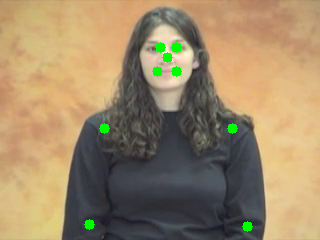

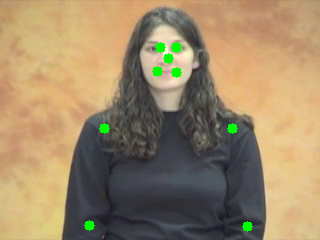

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

def extract_keypoints(frame, mp_pose, mp_hands, mp_solutions):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    pose_results = mp_pose.process(frame_rgb)

    # Process the frame with MediaPipe Hands
    hand_results = mp_hands.process(frame_rgb)

    # Define the desired keypoints for pose
    desired_pose_keypoint_indices = [mp_solutions.PoseLandmark.LEFT_SHOULDER,
                                     mp_solutions.PoseLandmark.RIGHT_SHOULDER,
                                     mp_solutions.PoseLandmark.LEFT_EYE_INNER,
                                     mp_solutions.PoseLandmark.RIGHT_EYE_INNER,
                                     mp_solutions.PoseLandmark.MOUTH_LEFT,
                                     mp_solutions.PoseLandmark.MOUTH_RIGHT,
                                     mp_solutions.PoseLandmark.NOSE,
                                     mp_solutions.PoseLandmark.RIGHT_ELBOW,
                                     mp_solutions.PoseLandmark.LEFT_ELBOW]

    # Define the indices of the desired hand keypoints
    desired_hand_keypoint_indices = [0, 1, 2, 4, 5, 8, 9, 12, 13, 16, 17, 20, 6, 10, 14, 18]

    # Extract pose keypoints from the results
    pose_keypoints = []
    if pose_results.pose_landmarks:
        for landmark in desired_pose_keypoint_indices:
            keypoint = pose_results.pose_landmarks.landmark[landmark.value]
            pose_keypoints.append([keypoint.x, keypoint.y, keypoint.z])

    # Extract hand keypoints from the results
    hand_keypoints = []
    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
                for i, landmark in enumerate(hand_landmarks.landmark):
                    if i in desired_hand_keypoint_indices:
                        hand_keypoints.append([landmark.x, landmark.y, landmark.z])

    return pose_keypoints, hand_keypoints

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands.Hands()

# Example usage
video_path = '/content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08915.mp4'

# Define the desired frame indices
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the desired frame indices based on video length
interval = 5  # Adjust this value as needed
selected_frames = range(0, frame_count, interval)

frame_index = 0
combined_keypoints = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Extract keypoints using MediaPipe Pose and Hands
    pose_keypoints, hand_keypoints = extract_keypoints(frame, mp_pose, mp_hands, mp.solutions.pose)

    # Check if both pose and hand keypoints are detected
    if pose_keypoints and hand_keypoints and frame_index in selected_frames:
        # Combine pose and hand keypoints
        combined_keypoint = pose_keypoints + hand_keypoints
        combined_keypoints.append(combined_keypoint)

    if frame_index in selected_frames:
        # Draw pose keypoints on the frame
        for kp in pose_keypoints:
            x, y, _ = kp
            cv2.circle(frame, (int(x * frame.shape[1]), int(y * frame.shape[0])), 5, (0, 255, 0), -1)

        # Draw hand keypoints on the frame
        for kp in hand_keypoints:
            x, y, _ = kp
            cv2.circle(frame, (int(x * frame.shape[1]), int(y * frame.shape[0])), 5, (0, 255, 0), -1)

        # Display the frame with keypoints
        cv2_imshow(frame)

        # Wait for key press to display the next frame
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    frame_index += 1

# Release resources
cap.release()
cv2.destroyAllWindows()

In [ ]:
len(combined_keypoints)

7

In [ ]:
import numpy as np
combined_keypoints_array = np.array(combined_keypoints, dtype=object)
print(combined_keypoints_array.shape)

(7, 25, 3)


In [ ]:
combined_keypoints_array

array([[[0.6608140468597412, 0.5493585467338562, -0.1323559731245041],
        [0.4189904034137726, 0.5388933420181274, -0.12269710749387741],
        [0.5313223600387573, 0.263904869556427, -0.6121219992637634],
        [0.5020991563796997, 0.2675270736217499, -0.6047441363334656],
        [0.5376273989677429, 0.349153608083725, -0.5473828315734863],
        [0.4988524615764618, 0.3505788743495941, -0.5365532636642456],
        [0.5158411264419556, 0.3056989312171936, -0.6512928009033203],
        [0.2871812582015991, 0.7611364722251892, -0.4681175947189331],
        [0.7268779277801514, 0.8754683136940002, -0.11654753237962723],
        [0.3154798448085785, 0.6521105170249939,
         -1.5978042711140006e-07],
        [0.33769652247428894, 0.6527390480041504, -0.014326054602861404],
        [0.35793131589889526, 0.6380852460861206, -0.023310242220759392],
        [0.3858610689640045, 0.6147934794425964, -0.03812062740325928],
        [0.34585040807724, 0.5772324800491333, -0.0165078

In [ ]:
shape = [np.array(element).shape for element in combined_keypoints]
print(shape)

[(25, 3), (25, 3), (25, 3), (25, 3), (25, 3), (25, 3), (25, 3)]


Pooling to Generalize

In [ ]:
pooled_keypoints = np.mean(combined_keypoints, axis=0)

In [ ]:
pooled_keypoints.shape

(25, 3)

# Both hands KD

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

def extract_keypoints(frame, mp_pose, mp_hands, mp_solutions):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    pose_results = mp_pose.process(frame_rgb)

    # Process the frame with MediaPipe Hands
    hand_results = mp_hands.process(frame_rgb)

    # Define the desired keypoints for pose
    desired_pose_keypoint_indices = [mp_solutions.PoseLandmark.LEFT_SHOULDER,
                                     mp_solutions.PoseLandmark.RIGHT_SHOULDER,
                                     mp_solutions.PoseLandmark.LEFT_EYE_INNER,
                                     mp_solutions.PoseLandmark.RIGHT_EYE_INNER,
                                     mp_solutions.PoseLandmark.MOUTH_LEFT,
                                     mp_solutions.PoseLandmark.MOUTH_RIGHT,
                                     mp_solutions.PoseLandmark.NOSE,
                                     mp_solutions.PoseLandmark.RIGHT_ELBOW,
                                     mp_solutions.PoseLandmark.LEFT_ELBOW]

    # Define the indices of the desired hand keypoints
    desired_hand_keypoint_indices = [0, 1, 2, 4, 5, 8, 9, 12, 13, 16, 17, 20, 6, 10, 14, 18]

    # Extract pose keypoints from the results
    pose_keypoints = []
    if pose_results.pose_landmarks:
        for landmark in desired_pose_keypoint_indices:
            keypoint = pose_results.pose_landmarks.landmark[landmark.value]
            pose_keypoints.append([keypoint.x, keypoint.y, keypoint.z])

    # Extract hand keypoints from the results
    hand_keypoints = []
    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            keypoints = []
            for i, landmark in enumerate(hand_landmarks.landmark):
                if i in desired_hand_keypoint_indices:
                    keypoints.append([landmark.x, landmark.y, landmark.z])
            hand_keypoints.append(keypoints)

    return pose_keypoints, hand_keypoints

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands.Hands()

# Example usage
video_path = '/content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/book/07078.mp4'

# Define the desired frame indices
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the desired frame indices based on video length
interval = 5  # Adjust this value as needed
selected_frames = range(0, frame_count, interval)

frame_index = 0
combined_keypoints = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Extract keypoints using MediaPipe Pose and Hands
    pose_keypoints, hand_keypoints = extract_keypoints(frame, mp_pose, mp_hands, mp.solutions.pose)

    # Check if both pose and hand keypoints are detected
    if pose_keypoints and hand_keypoints and frame_index in selected_frames:
        # Combine pose and hand keypoints
        combined_keypoints.extend(pose_keypoints + hand_keypoints)

        # Draw pose keypoints on the frame
        for kp in pose_keypoints:
            x, y, _ = kp
            cv2.circle(frame, (int(x * frame.shape[1]), int(y * frame.shape[0])), 5, (0, 255, 0), -1)

        # Draw hand keypoints on the frame
        for keypoints in hand_keypoints:
            for kp in keypoints:
                x, y, _ = kp
                cv2.circle(frame, (int(x * frame.shape[1]), int(y * frame.shape[0])), 5, (0, 255, 0), -1)

        # Display the frame with keypoints
        cv2_imshow(frame)

        # Wait for key press to display the next frame
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    frame_index += 1

# Release resources
cap.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np

# Create an empty adjacency matrix
num_keypoints = len(combined_keypoints)
adjacency_matrix = np.zeros((num_keypoints, num_keypoints))

# Define a threshold for determining the connectivity between keypoints
threshold = 0.8

# Iterate through each pair of keypoints
for i in range(num_keypoints):
    for j in range(i + 1, num_keypoints):
        # Calculate the Euclidean distance between keypoints i and j
        distance = np.linalg.norm(np.array(combined_keypoints[i]) - np.array(combined_keypoints[j]))

        # If the distance is below the threshold, set the corresponding entry in the adjacency matrix to 1
        if distance < threshold:
            adjacency_matrix[i, j] = 1
            adjacency_matrix[j, i] = 1

# Print the adjacency matrix
print(adjacency_matrix.shape)

(140, 140)


In [ ]:
import numpy as np
combined_keypoints_array = np.array(combined_keypoints)
print(combined_keypoints_array.shape)

(140,)


<ipython-input-11-00af8031f16a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  combined_keypoints_array = np.array(combined_keypoints)


In [ ]:
combined_keypoints[0]

[0.6739846467971802, 0.5163148641586304, -0.09765748679637909]

In [ ]:
# Example usage
keypoints_batch = []
for i in range(0, len(combined_keypoints), 3):
  keypoints_batch.append(combined_keypoints[i:i+3])

print(keypoints_batch[0][0])

[0.6739846467971802, 0.5163148641586304, -0.09765748679637909]


In [ ]:
import torch
from transformers import BertModel, BertTokenizer

# Load the pre-trained transformer model
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Define a function to extract features from keypoints using the transformer
def extract_features_from_keypoints(keypoints_batch):
    features_batch = []
    for keypoints in keypoints_batch:
        features = []
        for keypoints_list in keypoints:
            keypoints_text = ' '.join([f'({keypoints_list[0]},{keypoints_list[1]},{keypoints_list[2]})'])
            inputs = tokenizer(keypoints_text, return_tensors='pt')
            outputs = model(**inputs)
            feature = outputs.last_hidden_state.squeeze()
            features.append(feature)
        features_batch.append(features)

    return features_batch

# Extract features from keypoints batch using the transformer
features_batch = extract_features_from_keypoints(keypoints_batch)

# Print the extracted features for each batch
for features in features_batch:
    for feature in features:
        print(feature.shape)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([43, 768])
torch.Size([42, 768])
torch.Size([42, 768])
torch.Size([40, 768])
torch.Size([39, 768])
torch.Size([43, 768])
torch.Size([40, 768])
torch.Size([41, 768])
torch.Size([44, 768])
torch.Size([131, 768])
torch.Size([46, 768])
torch.Size([43, 768])
torch.Size([45, 768])
torch.Size([42, 768])
torch.Size([42, 768])
torch.Size([44, 768])
torch.Size([41, 768])
torch.Size([42, 768])
torch.Size([43, 768])
torch.Size([133, 768])
torch.Size([42, 768])
torch.Size([40, 768])
torch.Size([42, 768])
torch.Size([40, 768])
torch.Size([42, 768])
torch.Size([45, 768])
torch.Size([44, 768])
torch.Size([44, 768])
torch.Size([43, 768])
torch.Size([131, 768])
torch.Size([44, 768])
torch.Size([42, 768])
torch.Size([40, 768])
torch.Size([41, 768])
torch.Size([41, 768])
torch.Size([41, 768])
torch.Size([40, 768])
torch.Size([43, 768])
torch.Size([42, 768])
torch.Size([132, 768])
torch.Size([43, 768])
torch.Size([44, 768])
torch.Size([42, 768])
torch.Size([43, 768])
torch.Size([45, 768])
torch.

# Keypoints feature extraction using transformer

In [ ]:
import numpy as np

In [ ]:
import cv2
import mediapipe as mp
from transformers import BertTokenizer, BertModel
import torch

def preprocess_frame(frame, mp_pose, mp_hands, mp_solutions):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    pose_results = mp_pose.process(frame_rgb)

    # Process the frame with MediaPipe Hands
    hand_results = mp_hands.process(frame_rgb)

    # Define the desired keypoints for pose
    desired_pose_keypoint_indices = [mp_solutions.PoseLandmark.LEFT_SHOULDER,
                                     mp_solutions.PoseLandmark.RIGHT_SHOULDER,
                                     mp_solutions.PoseLandmark.LEFT_EYE_INNER,
                                     mp_solutions.PoseLandmark.RIGHT_EYE_INNER,
                                     mp_solutions.PoseLandmark.MOUTH_LEFT,
                                     mp_solutions.PoseLandmark.MOUTH_RIGHT,
                                     mp_solutions.PoseLandmark.NOSE,
                                     mp_solutions.PoseLandmark.RIGHT_ELBOW,
                                     mp_solutions.PoseLandmark.LEFT_ELBOW]

    # Define the indices of the desired hand keypoints
    desired_hand_keypoint_indices = [0, 1, 2, 4, 5, 8, 9, 12, 13, 16, 17, 20, 6, 10, 14, 18]

    # Extract pose keypoints from the results
    pose_keypoints = []
    if pose_results.pose_landmarks:
        for landmark in desired_pose_keypoint_indices:
            keypoint = pose_results.pose_landmarks.landmark[landmark.value]
            pose_keypoints.append([keypoint.x, keypoint.y, keypoint.z])

    # Extract hand keypoints from the results
    hand_keypoints = []
    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            keypoints = []
            for i, landmark in enumerate(hand_landmarks.landmark):
                if i in desired_hand_keypoint_indices:
                    keypoints.append([landmark.x, landmark.y, landmark.z])
            hand_keypoints.append(keypoints)

    return pose_keypoints, hand_keypoints


# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands.Hands()

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_features_from_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the desired step size based on the total number of frames
    if total_frames < 100:
        step_size = 1
    else:
        step_size = total_frames // 50

    # Initialize an empty list to store the features
    features = []

    # Iterate over the frames in the video
    frame_index = 0
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Process frames based on the step size
        if frame_index % step_size == 0:
            # Extract keypoints using MediaPipe Pose and Hands
            pose_keypoints, hand_keypoints = preprocess_frame(frame, mp_pose, mp_hands, mp.solutions.pose)

            # Check if both pose and hand keypoints are detected
            if pose_keypoints and hand_keypoints:
                # Combine pose and hand keypoints
                combined_keypoints = pose_keypoints + hand_keypoints

                # Convert the combined keypoints to text
                text = ' '.join([str(coord) for keypoint in combined_keypoints for coord in keypoint])

                # Tokenize the text
                tokens = tokenizer.encode(text, add_special_tokens=True)

                # Truncate or pad the tokens to a fixed length
                max_length = 512  # Specify the desired maximum length
                padded_tokens = tokens[:max_length] + [0] * (max_length - len(tokens))

                # Convert the padded tokens to a PyTorch tensor
                input_ids = torch.tensor([padded_tokens])

                # Pass the input_ids through the BERT model
                with torch.no_grad():
                    outputs = model(input_ids)

                # Extract the features from the BERT model
                features.append(outputs.last_hidden_state.squeeze().numpy())

        frame_index += 1

    # If the number of extracted features is less than 50, pad with zeros
    while len(features) < 50:
        features.append(np.zeros_like(features[0]))

    # If the number of extracted features is more than 50, truncate to 50
    features = features[:50]

    # Release resources
    cap.release()
    return features

# Example usage
video_path = '/content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/small/52551.mp4'
features = extract_features_from_video(video_path)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Token indices sequence length is longer than the specified maximum sequence length for this model (996 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
import numpy as np
np.array(features).shape

(50, 512, 768)

In [ ]:
features = np.array(features)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def generate_adjacency_matrix(features, threshold):
    features = np.array(features)
    num_nodes, seq_len, feature_dim = features.shape

    # Reshape the feature array to (num_nodes, seq_len * feature_dim)
    reshaped_features = features.reshape((num_nodes, seq_len * feature_dim))

    # Compute pairwise cosine similarity between feature vectors
    similarity_matrix = cosine_similarity(reshaped_features)

    # Create adjacency matrix based on similarity and threshold
    adjacency_matrix = np.where(similarity_matrix >= threshold, 1, 0)

    return adjacency_matrix


In [ ]:
b = generate_adjacency_matrix(features,0.85)

In [ ]:
b[25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

# Npzs creation cell

In [ ]:
import os
import numpy as np
from IPython.display import display, Javascript

def restart_runtime():
    display(Javascript('google.colab.kernel.restart();'))

def run_all_cells():
    display(Javascript('''
        var cells = document.querySelectorAll('.cell.code');
        cells.forEach((cell) => {
            cell.dispatchEvent(new Event('run'));
        });
    '''))

# Function to process a single video and create feature adjacency label
def create_feature_adjacency_label(video_path):
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    features = extract_features_from_video(video_path)

    # Create the adjacency matrix
    adjacency_matrix = generate_adjacency_matrix(features, 0.85)

    # Use the folder name as the label
    label = os.path.basename(os.path.dirname(video_path))

    np.savez(f'/content/drive/MyDrive/WLASL/start_kit/transformer_npzs/{video_name}.npz', features=features, adjacency_matrix=adjacency_matrix, label=label)
    del features, adjacency_matrix
    print("Processing video:", video_path)

# Path to the folder containing the videos
folder_path = '/content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy'

# Iterate over all videos in the folder
for filename in os.listdir(folder_path):
    video_path = os.path.join(folder_path, filename)
    if filename.endswith('.mp4'):
        create_feature_adjacency_label(video_path)
        restart_runtime()
        run_all_cells()

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08928.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08918.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08919.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/65298.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08921.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08924.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08915.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing video: /content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/candy/08925.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Plotting the keypoints

In [ ]:
import cv2
import mediapipe as mp

def extract_keypoints(frame, mp_pose, mp_hands, mp_solutions):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    pose_results = mp_pose.process(frame_rgb)

    # Process the frame with MediaPipe Hands
    hand_results = mp_hands.process(frame_rgb)

    # Define the desired keypoints for pose
    desired_pose_keypoint_indices = [mp_solutions.PoseLandmark.LEFT_SHOULDER,
                                     mp_solutions.PoseLandmark.RIGHT_SHOULDER,
                                     mp_solutions.PoseLandmark.LEFT_EYE_INNER,
                                     mp_solutions.PoseLandmark.RIGHT_EYE_INNER,
                                     mp_solutions.PoseLandmark.MOUTH_LEFT,
                                     mp_solutions.PoseLandmark.MOUTH_RIGHT,
                                     mp_solutions.PoseLandmark.NOSE,
                                     mp_solutions.PoseLandmark.RIGHT_ELBOW,
                                     mp_solutions.PoseLandmark.LEFT_ELBOW]

    # Define the indices of the desired hand keypoints
    desired_hand_keypoint_indices = [0, 1, 2, 4, 5, 8, 9, 12, 13, 16, 17, 20, 6, 10, 14, 18]

    # Extract pose keypoints from the results
    pose_keypoints = []
    if pose_results.pose_landmarks:
        for landmark in desired_pose_keypoint_indices:
            keypoint = pose_results.pose_landmarks.landmark[landmark.value]
            pose_keypoints.append((keypoint.x, keypoint.y, keypoint.z))

    # Extract hand keypoints from the results
    hand_keypoints = []
    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            for i, landmark in enumerate(hand_landmarks.landmark):
                if i in desired_hand_keypoint_indices:
                    hand_keypoints.append((landmark.x, landmark.y, landmark.z))

    return pose_keypoints, hand_keypoints

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands.Hands()

# Example usage
video_path ='/content/drive/MyDrive/WLASL/start_kit/preprocessed_videos/book/07070.mp4'

# Define the desired frame indices
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the desired frame indices based on video length
interval = 5  # Adjust this value as needed
selected_frames = range(0, frame_count, interval)

frame_index = 0
pose_keypoints_list = []
hand_keypoints_list = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Extract keypoints using MediaPipe Pose and Hands
    pose_keypoints, hand_keypoints = extract_keypoints(frame, mp_pose, mp_hands, mp.solutions.pose)

    # Check if both pose and hand keypoints are detected
    if pose_keypoints and hand_keypoints:
        pose_keypoints_list.append(pose_keypoints)
        hand_keypoints_list.append(hand_keypoints)

    frame_index += 1

# Release resources
cap.release()

# Combine pose and hand keypoints into a single list
all_keypoints = pose_keypoints_list + hand_keypoints_list

# Flatten the list and convert it to a set to get unique keypoints
unique_keypoints = set(keypoint for keypoints in all_keypoints for keypoint in keypoints)

# Print the unique keypoints
print(unique_keypoints)


{(0.5344243049621582, 0.6928466558456421, -0.07437647134065628), (0.5670762658119202, 0.6601268649101257, -0.04794193431735039), (0.5172345638275146, 0.6037359237670898, -0.008725592866539955), (0.49759361147880554, 0.827511727809906, -0.05167967826128006), (0.5994299054145813, 0.6739378571510315, -0.027534611523151398), (0.36226093769073486, 0.529898464679718, -0.5149878263473511), (0.47483259439468384, 0.7296907305717468, -8.421926622759202e-08), (0.5130895376205444, 0.7484655380249023, -0.04300057888031006), (0.7259083986282349, 0.9742968678474426, -0.7155078649520874), (0.5053182244300842, 0.7094001173973083, -0.04064048454165459), (0.6007838249206543, 0.6971127390861511, -0.007952598854899406), (0.621203601360321, 0.6612774729728699, -0.013485371135175228), (0.5330953598022461, 0.6577208042144775, -0.03590025007724762), (0.6194588541984558, 0.6612313389778137, -0.013523247092962265), (0.6875685453414917, 0.9710718393325806, -1.0072098970413208), (0.5084363222122192, 0.692633867263

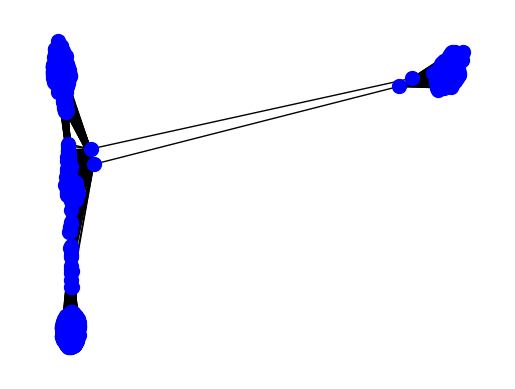

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Calculate the Euclidean distance between two keypoints
def calculate_distance(keypoint1, keypoint2):
    x1, y1, z1 = keypoint1
    x2, y2, z2 = keypoint2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return distance

# Define the threshold for connecting keypoints
threshold = 0.4  # Adjust this value as needed

# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
for keypoints in unique_keypoints:
    graph.add_node(keypoints)

# Connect the keypoints based on their proximity
for keypoints in unique_keypoints:
    for other_keypoints in unique_keypoints:
        if keypoints != other_keypoints:
            # Calculate the distance between keypoints
            distance = calculate_distance(keypoints, other_keypoints)

            # If the distance is below the threshold, connect the keypoints in the graph
            if distance < threshold:
                graph.add_edge(keypoints, other_keypoints)

# Draw the graph
pos = nx.spring_layout(graph)  # Layout algorithm for node positioning
nx.draw_networkx_nodes(graph, pos=pos, node_color='blue', node_size=100)
nx.draw_networkx_edges(graph, pos=pos, edge_color='black', width=1)

# Remove labels from the graph
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
import numpy as np
a = np.array(list(unique_keypoints))
a.shape

(1089, 3)

In [ ]:
len(pose_keypoints_list), len(hand_keypoints_list)

(41, 41)

# **Creating adjacency matrix

In [ ]:
import cv2
import mediapipe as mp
import networkx as nx
import numpy as np

def calculate_distance(keypoint1, keypoint2):
    if len(keypoint1) == 2 and len(keypoint2) == 2:
        x1, y1 = keypoint1
        x2, y2 = keypoint2
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    elif len(keypoint1) == 3 and len(keypoint2) == 3:
        x1, y1, z1 = keypoint1
        x2, y2, z2 = keypoint2
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    else:
        raise ValueError("Invalid number of values in keypoints")
    return distance


def extract_keypoints(frame, mp_pose, mp_hands, mp_solutions):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    pose_results = mp_pose.process(frame_rgb)

    # Process the frame with MediaPipe Hands
    hand_results = mp_hands.process(frame_rgb)

    # Define the desired keypoints for pose
    desired_pose_keypoint_indices = [mp_solutions.PoseLandmark.LEFT_SHOULDER,
                                     mp_solutions.PoseLandmark.RIGHT_SHOULDER,
                                     mp_solutions.PoseLandmark.LEFT_EYE_INNER,
                                     mp_solutions.PoseLandmark.RIGHT_EYE_INNER,
                                     mp_solutions.PoseLandmark.MOUTH_LEFT,
                                     mp_solutions.PoseLandmark.MOUTH_RIGHT,
                                     mp_solutions.PoseLandmark.NOSE,
                                     mp_solutions.PoseLandmark.RIGHT_ELBOW,
                                     mp_solutions.PoseLandmark.LEFT_ELBOW]

    # Define the indices of the desired hand keypoints
    desired_hand_keypoint_indices = [0, 1, 2, 4, 5, 8, 9, 12, 13, 16, 17, 20, 6, 10, 14, 18]

    # Extract pose keypoints from the results
    pose_keypoints = []
    if pose_results.pose_landmarks:
        for landmark in desired_pose_keypoint_indices:
            keypoint = pose_results.pose_landmarks.landmark[landmark.value]
            pose_keypoints.append((keypoint.x, keypoint.y, keypoint.z))

    # Extract hand keypoints from the results
    hand_keypoints = []
    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            for i, landmark in enumerate(hand_landmarks.landmark):
                if i in desired_hand_keypoint_indices:
                    hand_keypoints.append((landmark.x, landmark.y, landmark.z))

    return pose_keypoints, hand_keypoints

def pad_keypoints(keypoints, num_keypoints):
    if len(keypoints) < num_keypoints:
        # Pad keypoints with zeros to match the desired number of keypoints
        padding = [(0, 0)] * (num_keypoints - len(keypoints))
        keypoints = keypoints + padding
    elif len(keypoints) > num_keypoints:
        # Subsample keypoints to match the desired number of keypoints
        indices = np.linspace(0, len(keypoints) - 1, num_keypoints, dtype=int)
        keypoints = [keypoints[i] for i in indices]
    return keypoints

def get_adjacency_matrix(video_path, num_keypoints, threshold):
    # Initialize MediaPipe Pose
    mp_pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

    # Initialize MediaPipe Hands
    mp_hands = mp.solutions.hands.Hands()

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Initialize keypoints list
    all_keypoints = []

    # Process each frame and extract keypoints
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Extract keypoints using MediaPipe Pose and Hands
        pose_keypoints, hand_keypoints = extract_keypoints(frame, mp_pose, mp_hands, mp.solutions.pose)

        # Pad or subsample keypoints to a fixed length
        pose_keypoints = pad_keypoints(pose_keypoints, num_keypoints)
        hand_keypoints = pad_keypoints(hand_keypoints, num_keypoints)

        # Append keypoints to the all_keypoints list
        all_keypoints.extend(pose_keypoints)
        all_keypoints.extend(hand_keypoints)

    # Create the graph
    graph = nx.Graph()

    # Add nodes to the graph
    for keypoints in all_keypoints:
        graph.add_node(keypoints)

    # Connect the keypoints based on their proximity
    for keypoints in all_keypoints:
        for other_keypoints in all_keypoints:
            if keypoints != other_keypoints:
                # Calculate the distance between keypoints
                distance = calculate_distance(keypoints, other_keypoints)

                # If the distance is below the threshold, connect the keypoints in the graph
                if distance < threshold:
                    graph.add_edge(keypoints, other_keypoints)

    # Get the adjacency matrix as a NumPy array
    adjacency_matrix = nx.to_numpy_array(graph)

    # Release resources
    cap.release()

    return adjacency_matrix

In [ ]:
b = get_adjacency_matrix("/content/drive/MyDrive/WLASL/start_kit/videos/a/01611.mp4", 10, 0.1)

ValueError: ignored

# Model Architecture and Training GCN

In [ ]:
import os
from sklearn.preprocessing import LabelEncoder

main_folder_path = '/content/drive/MyDrive/WLASL/start_kit/preprocessed_videos'

# Get the list of subfolders (classes)
class_folders = [folder for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

# Perform label encoding on the subfolders
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_folders)

# Create a dictionary to map the subfolder name to the encoded label
label_dict = dict(zip(class_folders, encoded_labels))

In [ ]:
label_dict

{'book': 1,
 'before': 0,
 'go': 6,
 'candy': 3,
 'cousin': 5,
 'corn': 4,
 'school': 7,
 'work': 9,
 'brown': 2,
 'small': 8}

In [ ]:
from keras.utils import to_categorical
def process_video(subfolder_name, label_dict):

    # Get the encoded label for the subfolder
    encoded_label = label_dict[subfolder_name]

    # Create a one-hot encoded label vector
    one_hot_label = to_categorical(encoded_label, num_classes=len(label_dict))

    return one_hot_label

In [ ]:
import random
import os

# Specify the directory path where the NPZ files are located
npz_folder = "/content/drive/MyDrive/WLASL/start_kit/transformer_npzs"

# Get a list of all the NPZ files in the folder
npz_files = [file for file in os.listdir(npz_folder) if file.endswith('.npz')]

# Extract the video IDs from the NPZ filenames
video_ids = [file.split('.')[0] for file in npz_files]

# Print the video IDs
print(video_ids)

# Define the split ratios for train, test, and validation sets
train_ratio = 0.7
test_ratio = 0.1
validation_ratio = 0.2

# Calculate the number of videos for each set
num_videos = len(video_ids)
num_train = int(train_ratio * num_videos)
num_test = int(test_ratio * num_videos)
num_validation = num_videos - num_train - num_test

# Randomly shuffle the video IDs
random.shuffle(video_ids)

# Split the video IDs into train, test, and validation sets
train_ids = video_ids[:num_train]
test_ids = video_ids[num_train:num_train+num_test]
validation_ids = video_ids[num_train+num_test:]

# Print the number of videos in each set
print("Train set:", len(train_ids), "videos")
print("Test set:", len(test_ids), "videos")
print("Validation set:", len(validation_ids), "videos")

['24956', '24955', '24972', '24941', '65824', '24943', '24973', '24947', '24940', '24952', '24954', '05748', '05750', '05749', '05729', '05732', '05733', '05742', '05739', '69241', '07090', '07070', '07069', '07098', '07091', '07096', '07086', '07087', '07093', '07094', '07080', '07083', '07081', '07084', '07078', '69252', '07963', '65263', '07973', '07960', '07972', '07962', '07961', '13325', '13326', '13327', '13328', '13333', '13334', '13336', '13335', '13648', '13631', '13633', '13634', '13630', '13641', '13642', '13644', '49604', '49602', '49595', '49605', '69455', '49598', '49599', '49600', '52552', '52554', '52555', '52556', '52560', '52565', '52557', '52566', '52551', '63806', '63791', '63792', '63805', '63795', '63793', '66804', '63799', '08928', '08918', '08919', '65298', '08921', '08924', '08915', '08925']
Train set: 64 videos
Test set: 9 videos
Validation set: 19 videos


In [ ]:
!pip install spektral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import spektral
from spektral.utils import sp_matrix_to_sp_tensor
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model
from keras.regularizers import l2
import numpy as np

In [ ]:
import tensorflow as tf
from keras.layers import Input, BatchNormalization, Dropout, Flatten, Dense, Reshape
from keras.models import Model
from spektral.layers import GCNConv, GlobalMaxPool

# Define the padding value
padding_value = 0

# Define the maximum number of nodes (videos) in your dataset
max_nodes = 50

# Input shapes
X_in = Input(shape=(max_nodes, 393216))
A_in = Input(shape=(max_nodes, max_nodes))

# Padding
X_padded = tf.pad(X_in, paddings=[[0, 0], [0, max_nodes - tf.shape(X_in)[1]], [0, 0]], constant_values=padding_value)
A_padded = tf.pad(A_in, paddings=[[0, 0], [0, max_nodes - tf.shape(A_in)[1]], [0, max_nodes - tf.shape(A_in)[2]]], constant_values=padding_value)

# GCN layers with padding
GCN1 = GCNConv(channels=512, activation='elu', kernel_initializer='he_normal', name='GCN1')([X_padded, A_padded])
B1 = BatchNormalization()(GCN1)
GCN2 = GCNConv(channels=256, activation='elu', kernel_initializer='he_normal', name='GCN2')([B1, A_padded])
B2 = BatchNormalization()(GCN2)
D1 = Dropout(0.5)(B2)
GCN3 = GCNConv(channels=256, activation='elu', kernel_initializer='he_normal', name='GCN3')([D1, A_padded])
B3 = BatchNormalization()(GCN3)
GCN4 = GCNConv(channels=128, activation='elu', kernel_initializer='he_normal', name='GCN4')([B3, A_padded])
B4 = BatchNormalization()(GCN4)
D2 = Dropout(0.5)(B4)
GCN5 = GCNConv(channels=128, activation='elu', kernel_initializer='he_normal', name='GCN5')([D2, A_padded])
B5 = BatchNormalization()(GCN5)
GCN6 = GCNConv(channels=64, activation='elu', kernel_initializer='he_normal', name='GCN6')([B5, A_padded])
B6 = BatchNormalization()(GCN6)

# Rest of the model architecture
MP1 = GlobalMaxPool()(B6)
D3 = Dropout(0.5)(MP1)
flatten = Flatten()(D3)
DS1 = Dense(64, activation='relu', kernel_initializer='he_normal')(flatten)
B7 = BatchNormalization()(DS1)
DS2 = Dense(32, activation='relu', kernel_initializer='he_normal')(B7)
B8 = BatchNormalization()(DS2)
D3 = Dropout(0.6)(B8)
output = Dense(10, activation='softmax')(D3)

# Create the model
model = Model(inputs=[X_in, A_in], outputs=output)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 393216)  0           []                               
                                ]                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, 50, 50)]     0           []                               
                                                                                                  
 tf.compat.v1.shape (TFOpLambda  (3,)                0           ['input_1[0][0]']                
 )                                                                                                
                                                                                              

In [ ]:
npz_folder = "/content/drive/MyDrive/WLASL/start_kit/transformer_npzs"

In [ ]:
def train_data_generator(npz_folder, train_ids, batch_size=8):
    while True:
        np.random.shuffle(train_ids)
        for i in range(0, len(train_ids), batch_size):
            batch_ids = train_ids[i:i+batch_size]
            batch_features = []
            batch_adjacency_matrix = []
            batch_labels = []

            for video_id in batch_ids:
                npz_file = os.path.join(npz_folder, f'{video_id}.npz')
                data = np.load(npz_file)

                features = data['features']
                features = features.reshape(features.shape[0], -1)
                adjacency_matrix = data['adjacency_matrix']
                labels = str(data['label'])
                labels = process_video(labels,label_dict)

                batch_features.append(features)
                batch_adjacency_matrix.append(adjacency_matrix)
                batch_labels.append(labels)

            batch_features = np.array(batch_features)
            batch_adjacency_matrix = np.array(batch_adjacency_matrix)
            batch_labels = np.array(batch_labels)

            yield (batch_features, batch_adjacency_matrix), batch_labels

In [ ]:
def test_data_generator(npz_folder, test_ids, batch_size=8):
    while True:
        np.random.shuffle(test_ids)
        for i in range(0, len(test_ids), batch_size):
            batch_ids = test_ids[i:i+batch_size]
            batch_features = []
            batch_adjacency_matrices = []
            batch_labels = []

            for video_id in batch_ids:
                npz_file = os.path.join(npz_folder, f'{video_id}.npz')
                data = np.load(npz_file)

                features = data['features']
                features = features.reshape(features.shape[0], -1)
                adjacency_matrix = data['adjacency_matrix']
                labels = str(data['label'])
                labels = process_video(labels, label_dict)

                batch_features.append(features)
                batch_adjacency_matrices.append(adjacency_matrix)
                batch_labels.append(labels)

            batch_features = np.array(batch_features)
            batch_adjacency_matrices = np.array(batch_adjacency_matrices)
            batch_labels = np.array(batch_labels)

            yield (batch_features, batch_adjacency_matrices), batch_labels

# Generate the test data using the test_data_generator function
test_data_gen = test_data_generator(npz_folder, test_ids, batch_size=8)

In [ ]:
def valid_data_generator(npz_folder, validation_ids, batch_size=8):
    while True:
        np.random.shuffle(validation_ids)
        for i in range(0, len(validation_ids), batch_size):
            batch_ids = validation_ids[i:i+batch_size]
            batch_features = []
            batch_adjacency_matrix = []
            batch_labels = []

            for video_id in batch_ids:
                npz_file = os.path.join(npz_folder, f'{video_id}.npz')
                data = np.load(npz_file)

                features = data['features']
                features = features.reshape(features.shape[0], -1)
                adjacency_matrix = data['adjacency_matrix']
                labels = str(data['label'])
                labels = process_video(labels,label_dict)

                batch_features.append(features)
                batch_adjacency_matrix.append(adjacency_matrix)
                batch_labels.append(labels)

            batch_features = np.array(batch_features)
            batch_adjacency_matrix = np.array(batch_adjacency_matrix)
            batch_labels = np.array(batch_labels)

            yield (batch_features, batch_adjacency_matrix), batch_labels

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=10,verbose=1,
    restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=7,min_lr=1e-7,verbose=1)

callbacks = [early_stopping,lr_scheduler]

In [ ]:
epochs = 75
history = model.fit(train_data_generator(npz_folder, train_ids,8), epochs=epochs, batch_size= 8, steps_per_epoch = 10, validation_data=valid_data_generator(npz_folder, validation_ids,8), validation_steps=2, callbacks=callbacks)

Epoch 1/75
10/10 [==============================] - 72s 7s/step - loss: 3.5358 - accuracy: 0.1000 - val_loss: 181.7396 - val_accuracy: 0.1875 - lr: 5.0000e-04
Epoch 2/75
10/10 [==============================] - 57s 6s/step - loss: 3.3919 - accuracy: 0.1875 - val_loss: 480.2271 - val_accuracy: 0.1875 - lr: 5.0000e-04
Epoch 3/75
10/10 [==============================] - 58s 6s/step - loss: 2.9444 - accuracy: 0.1375 - val_loss: 37.6274 - val_accuracy: 0.2500 - lr: 5.0000e-04
Epoch 4/75
10/10 [==============================] - 57s 6s/step - loss: 3.6725 - accuracy: 0.0750 - val_loss: 22.0217 - val_accuracy: 0.2500 - lr: 5.0000e-04
Epoch 5/75
10/10 [==============================] - 56s 6s/step - loss: 3.7098 - accuracy: 0.1000 - val_loss: 20.4020 - val_accuracy: 0.2500 - lr: 5.0000e-04
Epoch 6/75
10/10 [==============================] - 55s 6s/step - loss: 3.7345 - accuracy: 0.0750 - val_loss: 11.9807 - val_accuracy: 0.1875 - lr: 5.0000e-04
Epoch 7/75
10/10 [==============================] 

In [ ]:
train_data_gen = train_data_generator(npz_folder, train_ids,8)
test_data_gen = test_data_generator(npz_folder, train_ids,8)
valid_data_gen = valid_data_generator(npz_folder, train_ids,8)

In [ ]:
# Define the number of epochs and steps per epoch
epochs = 10
batch_size = 8
steps_per_epoch = 10

# Fit the model using the train and validation data generators
epochs = 75
history = model.fit(train_data_generator(npz_folder, train_ids,8), epochs=epochs, batch_size= 8, steps_per_epoch = 10, validation_data=valid_data_generator(npz_folder, validation_ids,8), validation_steps=2, callbacks=callbacks)


Epoch 1/75
10/10 [==============================] - 252s 27s/step - loss: 4.3712 - accuracy: 0.1000 - val_loss: 5222.3247 - val_accuracy: 0.2500 - lr: 5.0000e-04
Epoch 2/75
10/10 [==============================] - 53s 6s/step - loss: 3.6628 - accuracy: 0.0750 - val_loss: 1123.5869 - val_accuracy: 0.1875 - lr: 5.0000e-04
Epoch 3/75
10/10 [==============================] - 58s 6s/step - loss: 3.6538 - accuracy: 0.1375 - val_loss: 189.6348 - val_accuracy: 0.1250 - lr: 5.0000e-04
Epoch 4/75
10/10 [==============================] - 57s 6s/step - loss: 3.6637 - accuracy: 0.0750 - val_loss: 104.7275 - val_accuracy: 0.1875 - lr: 5.0000e-04
Epoch 5/75
10/10 [==============================] - 54s 6s/step - loss: 3.7894 - accuracy: 0.1375 - val_loss: 84.5640 - val_accuracy: 0.1875 - lr: 5.0000e-04
Epoch 6/75
10/10 [==============================] - 58s 6s/step - loss: 3.6419 - accuracy: 0.1375 - val_loss: 36.9822 - val_accuracy: 0.1250 - lr: 5.0000e-04
Epoch 7/75
10/10 [==========================

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data_generator(npz_folder, test_ids,8), steps=10)

# Print the test results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
data = np.load('/content/drive/MyDrive/WLASL/start_kit/transformer_npzs/07069.npz')

features = data['features']
features = features.reshape(features.shape[0], -1)
adjacency_matrix = data['adjacency_matrix']
labels = str(data['label'])

print(features.shape)
print(adjacency_matrix.shape)
labels = process_video(labels,label_dict)
print(labels)

(50, 393216)
(50, 50)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
